# Algoritmos genéticos multiobjetivo

Algunas ocasiones es útil, o necesario, maximizar más de una función al mismo tiempo. Por ejemplo, se puede querer minimizar simultaneamente el tiempo de fabricación de una herramienta y también su costo.


![](https://img.remediosdigitales.com/be2cd2/optimo-de-pareto/1366_2000.jpg)

## 5.1 Manejo de restricciones 

Optimizar $f_i(x) (\forall i = 1,...,n)$

sujeto a $x \in X \subseteq  \mathbb{R}^n $, 

se trata de optimizar simultaneamente $n$ funciones, cuyas variables pueden estar sujetas a ciertas **restricciones**.








In [1]:
# !pip install deap

In [2]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
# Definimos los pesos de los objetivos. (1.0,) significa maximización.
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Creamos una caja de herramientas para la configuración de la evolución
toolbox = base.Toolbox()

# Registro de funciones de atributo, individuo y población
toolbox.register("attr_float", random.uniform, -10, 10)  # cada atributo es un float en el rango [-10, 10]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registro de funciones de evolución
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

# Definimos las funciones objetivo
def objective1(individual):
    return sum(x**2 for x in individual)

def objective2(individual):
    return 10. / sum((x-2)**2 for x in individual)

# Y las restricciones
def constraint(individual):
    # La suma de los valores del individuo debe ser menor o igual a 2
    if sum(individual) <= 2:
        return True,
    return False,



In [4]:
# toolbox.register("evaluate", objective1, objective2)
toolbox.register("evaluate", lambda ind: (objective1(ind), objective2(ind)))
toolbox.decorate("evaluate", tools.DeltaPenality(constraint, 100))  # imponemos una penalidazación si la restricción no se cumple

In [5]:
random.seed(64)

NGEN = 50
MU = 50
LAMBDA = 100
CXPB = 0.7
MUTPB = 0.3

pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
# stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
# stats.register("max", np.max, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                                         halloffame=hof) 

gen	nevals	avg                        	min                      
0  	50    	[105.828426     0.13617491]	[10.69957037  0.02822584]
1  	100   	[126.76545214   0.25452593]	[10.69957037  0.02822584]
2  	100   	[115.44667861   0.47522057]	[17.11666439  0.03185361]
3  	100   	[123.48160922   0.59247658]	[17.3011025   0.03933977]
4  	100   	[117.842333     0.71968525]	[17.3011025   0.03933977]
5  	100   	[118.67440702   0.77104231]	[17.3011025   0.03933977]
6  	100   	[123.6210124    0.88950309]	[16.00725399  0.03778223]
7  	100   	[110.55914553   1.11394864]	[16.00725399  0.03778223]
8  	100   	[134.21065523   1.45654557]	[12.18300875  0.03508532]
9  	100   	[126.57206564   1.8588618 ]	[11.14895262  0.03508532]
10 	100   	[128.63165347   2.45915633]	[11.14895262  0.03257709]
11 	100   	[128.00411053   2.78429025]	[11.14895262  0.03257709]
12 	100   	[132.49628888   2.76621867]	[11.14895262  0.03257709]
13 	100   	[125.85401704   2.95736432]	[11.14895262  0.03257709]
14 	100   	[141.85669324 

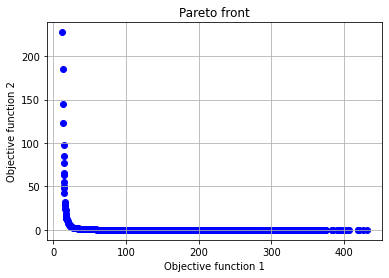

In [6]:
# Graficar el frente de Pareto
front = np.array([ind.fitness.values for ind in hof])
plt.scatter(front[:,0], front[:,1], c="b")
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.show()


## Dos funciones que NO se comporten parecido

In [7]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import matplotlib.pyplot as plt

# Definimos los pesos de los objetivos. (1.0,) significa maximización.
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Creamos una caja de herramientas para la configuración de la evolución
toolbox = base.Toolbox()

# Registro de funciones de atributo, individuo y población
toolbox.register("attr_float", random.uniform, -10, 10)  # cada atributo es un float en el rango [-10, 10]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registro de funciones de evolución
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

# Definimos las funciones objetivo
def objective1(individual):
    return sum(x for x in individual) # maximizar la suma de los elementos

def objective2(individual):
    return len(individual) / sum((x+1) for x in individual)  # maximizar la inversa de la suma de los elementos incrementados

# Y las restricciones
def constraint(individual):
    # La suma de los valores del individuo debe ser menor o igual a 2
    if sum(individual) <= 2:
        return True,
    return False,

toolbox.register("evaluate", lambda ind: (objective1(ind), objective2(ind)))
toolbox.decorate("evaluate", tools.DeltaPenality(constraint, 100))  # imponemos una penalidad si la restricción no se cumple


random.seed(64)

NGEN = 50
MU = 50
LAMBDA = 100
CXPB = 0.7
MUTPB = 0.3

#################

logbook = tools.Logbook()

# En tu bucle evolutivo, guardarías las soluciones generadas en cada generación:
for gen in range(NGEN):
    offspring = algorithms.varAnd(pop, toolbox, CXPB, MUTPB)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=MU)
    logbook.record(gen=gen, pop=pop)  # Guardar la población de esta generación en el Logbook

# # Al final de la evolución, tendrías todas las soluciones generadas:
# all_solutions = np.array([ind.fitness.values for gen in logbook for ind in gen['pop']])


###############
pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
# stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
# stats.register("max", np.max, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                                             halloffame=hof)



/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg                    	min                        
0  	50    	[0.06700745 0.28322808]	[-22.98283576  -4.9497683 ]
1  	100   	[7.78946165 1.86030904]	[-2.93647189  0.11928114]  
2  	100   	[9.37804834 3.10938656]	[-2.93647189  0.09806883]  
3  	100   	[8.8653544  3.52576314]	[-2.93647189  0.09791766]  
4  	100   	[9.04852288 3.90707696]	[-2.93647189  0.09791766]  
5  	100   	[7.69971559 4.56641001]	[-2.93647189  0.09791766]  
6  	100   	[11.46955374  8.6217565 ]	[-2.99012017  0.09791766]  
7  	100   	[9.76266053 9.12529628]  	[-2.99012017  0.09791766]  
8  	100   	[11.57158556 15.26866246]	[-2.99012017  0.09791766]  
9  	100   	[10.00228845 15.36605184]	[-2.99012017  0.09643363]  
10 	100   	[10.45364011 15.31855185]	[-2.99012017  0.09643363]  
11 	100   	[10.72284769 15.22428601]	[-2.99012017  0.09643363]  
12 	100   	[10.74429313 14.97511814]	[-2.99012017  0.09643363]  
13 	100   	[11.6233849 15.2250476]  	[-2.99012017  0.09643363]  
14 	100   	[11.2762128  15.27956076]	[-

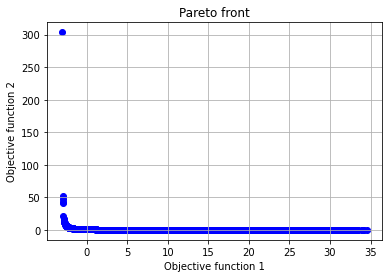

In [8]:
# Graficar el frente de Pareto
front = np.array([ind.fitness.values for ind in hof])
plt.scatter(front[:,0], front[:,1], c="b")
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.show()

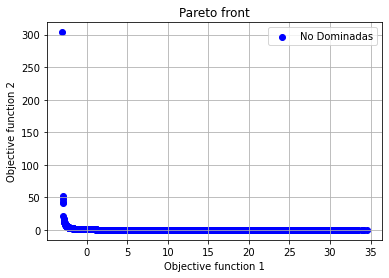

In [9]:
# Extraer todas las soluciones generadas
all_solutions = np.array([ind.fitness.values for ind in pop])

# Extraer las soluciones no dominantes (frente de Pareto)
non_dominated_solutions = np.array([ind.fitness.values for ind in hof])

# Extraer las soluciones dominantes
dominated_solutions = np.array([sol for sol in all_solutions if sol.tolist() not in non_dominated_solutions.tolist()])

# Graficar el frente de Pareto y las soluciones dominantes
plt.scatter(non_dominated_solutions[:,0], non_dominated_solutions[:,1], c="b", label='No Dominadas')
if dominated_solutions.size != 0:  # Solo graficar si hay soluciones dominadas
    plt.scatter(dominated_solutions[:,0], dominated_solutions[:,1], c="r", label='Dominadas')
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.legend()
plt.show()


gen	nevals	avg                      	min                        
0  	50    	[-0.37965387 -0.28566163]	[-26.50831436  -6.69595595]
1  	50    	[-0.33407393  0.25769989]	[-26.50831436  -6.69595595]
2  	50    	[-0.34948588 -0.69746623]	[-23.45912389 -29.15347976]
3  	50    	[-0.38566468 -0.23137465]	[-21.78591812  -7.71965825]
4  	50    	[-0.27391837 -0.54755125]	[-24.40026285 -10.4089731 ]
5  	50    	[-0.24206171  1.07474774]	[-20.94788742  -2.99407655]
6  	50    	[-0.31561253 -0.02682066]	[-24.76600796  -2.90868776]
7  	50    	[-0.28873096 -0.03762174]	[-24.27944065  -4.00228404]
8  	50    	[-0.33256241 -0.29163794]	[-24.76600796 -11.40664156]
9  	50    	[-0.31568092 -0.51042172]	[-24.3044395  -19.25028287]
10 	50    	[-0.26337737 -0.12878832]	[-29.05413114 -11.40664156]
11 	50    	[-0.23716702 -0.1549417 ]	[-28.09496747 -10.45742883]
12 	50    	[-0.18131162 -0.61374763]	[-23.32744502 -33.37923819]
13 	50    	[-0.17565014  0.16311967]	[-23.32744502 -33.37923819]
14 	50    	[-0.24176257  

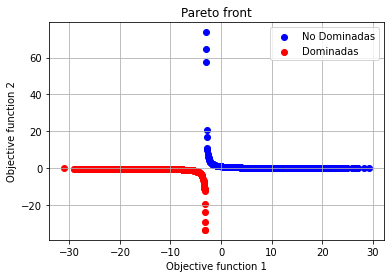

In [10]:
def main():
    random.seed(64)

    NGEN = 50
    MU = 50
    LAMBDA = 100
    CXPB = 0.7
    MUTPB = 0.3

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
#     stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
#     stats.register("max", np.max, axis=0)

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Bucle evolutivo
    for gen in range(NGEN):
        offspring = algorithms.varAnd(pop, toolbox, CXPB, MUTPB)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=MU)
        hof.update(pop)
        record = stats.compile(pop) if stats else {}
        logbook.record(gen=gen, nevals=len(offspring), pop=pop, **record)  # Guardar la población completa
        print(logbook.stream)

    # Extraer todas las soluciones generadas
    all_solutions = np.array([ind.fitness.values for gen in logbook for ind in gen['pop']])

    # Extraer las soluciones no dominantes (frente de Pareto)
    non_dominated_solutions = np.array([ind.fitness.values for ind in hof])

    # Extraer las soluciones dominantes
    dominated_solutions = np.array([sol for sol in all_solutions if sol.tolist() not in non_dominated_solutions.tolist()])

    # Graficar el frente de Pareto y las soluciones dominantes
    plt.scatter(non_dominated_solutions[:,0], non_dominated_solutions[:,1], c="b", label='No Dominadas')
    if dominated_solutions.size != 0:  # Solo graficar si hay soluciones dominadas
        plt.scatter(dominated_solutions[:,0], dominated_solutions[:,1], c="r", label='Dominadas')
    plt.axis("tight")
    plt.xlabel('Objective function 1')
    plt.ylabel('Objective function 2')
    plt.title('Pareto front')
    plt.grid(True)
    plt.legend()
    plt.show()

    return pop, logbook, hof

if __name__ == "__main__":
    main()


### Ejercicio: Definir otras dos funciones objetivo y graficar su frente de Pareto.

#### Usando AG simple el frente de Pareto no se logra del todo bien:

gen	nevals	avg                              	min                      
0  	50    	[ 1.05828426e+02 -7.03972105e-03]	[10.69957037 -0.77838962]
1  	40    	[ 1.04620190e+02 -8.57423397e-03]	[16.61467066 -0.33530191]
2  	33    	[ 1.05196739e+02 -1.09647492e-02]	[14.16226559 -0.33530191]
3  	39    	[ 1.04959621e+02 -7.92710979e-03]	[ 9.02845215 -0.271931  ]
4  	41    	[1.04529432e+02 1.82086102e-03]  	[ 6.94560743 -0.13238153]
5  	34    	[1.05162206e+02 5.52467149e-03]  	[ 6.15527158 -0.21269983]
6  	40    	[1.05096758e+02 3.83019292e-03]  	[ 0.71584776 -0.81679468]
7  	36    	[ 1.04915988e+02 -3.03393645e-02]	[ 6.68646773 -0.81679468]
8  	38    	[1.04779613e+02 2.92517291e-02]  	[10.29075694 -0.14399665]
9  	42    	[ 1.05449181e+02 -2.57716512e-03]	[ 8.85575298 -0.13221105]
10 	37    	[ 1.04911020e+02 -7.82730601e-03]	[10.29075694 -0.14399665]
11 	38    	[ 1.04950787e+02 -1.78776936e-02]	[10.31025013 -0.56380527]
12 	41    	[ 1.05739766e+02 -6.29805235e-03]	[10.96009538 -0.17019334]
13 	38

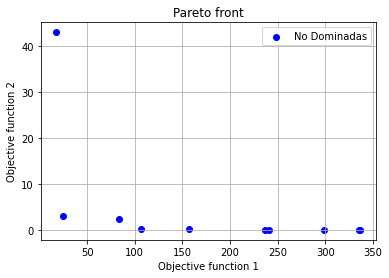

In [11]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import matplotlib.pyplot as plt

# Definimos los pesos de los objetivos. (1.0,) significa maximización.
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Creamos una caja de herramientas para la configuración de la evolución
toolbox = base.Toolbox()

# Registro de funciones de atributo, individuo y población
toolbox.register("attr_float", random.uniform, -10, 10)  # cada atributo es un float en el rango [-10, 10]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registro de funciones de evolución
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

# Definimos las funciones objetivo
def objective1(individual):
    return sum(x**2 for x in individual) # maximizar la suma de los elementos

def objective2(individual):
    return len(individual) / sum((x**3+1) for x in individual)  # maximizar la inversa de la suma de los elementos incrementados

# Y las restricciones
def constraint(individual):
    # La suma de los valores del individuo debe ser menor o igual a 2
    if sum(individual) <= 2:
        return True,
    return False,

toolbox.register("evaluate", lambda ind: (objective1(ind), objective2(ind)))
toolbox.decorate("evaluate", tools.DeltaPenality(constraint, 100))  # imponemos una penalidad si la restricción no se cumple


random.seed(64)
NGEN = 50
# MU = 50
# LAMBDA = 100
CXPB = 0.7
MUTPB = 0.3
MU = 50
pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
# stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
# stats.register("max", np.max, axis=0)

pop, logbook = algorithms.eaSimple(pop, toolbox, CXPB, MUTPB, NGEN, stats,
                                   halloffame=hof)
# Extraer todas las soluciones generadas
all_solutions = np.array([ind.fitness.values for ind in pop])

# Extraer las soluciones no dominantes (frente de Pareto)
non_dominated_solutions = np.array([ind.fitness.values for ind in hof])

# Graficar el frente de Pareto y las soluciones dominantes
plt.scatter(non_dominated_solutions[:,0], non_dominated_solutions[:,1], c="b", label='No Dominadas')
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.legend()
plt.show()

### Con operadores de selección y algoritmo genético especiales para problemas multiobjetivo

gen	nevals	avg                              	min                      
0  	50    	[ 1.05828426e+02 -7.03972105e-03]	[10.69957037 -0.77838962]
1  	100   	[1.29433106e+02 2.69030863e-02]  	[10.69957037 -0.11994485]
2  	100   	[1.31979846e+02 6.09867190e-02]  	[10.69957037 -0.06749817]
3  	100   	[1.44166542e+02 1.43729746e-01]  	[10.69957037 -0.01175824]
4  	100   	[1.81295817e+02 1.27085225e-01]  	[ 1.68068830e+01 -4.27575832e-03]
5  	100   	[2.30975393e+02 1.45342408e-01]  	[ 8.87407431e+01 -4.27575832e-03]
6  	100   	[2.24882746e+02 2.08300752e-01]  	[ 8.87407431e+01 -3.19131472e-03]
7  	100   	[2.39866375e+02 1.86818552e-01]  	[ 8.87407431e+01 -1.98816976e-03]
8  	100   	[239.63348607   0.30118389]      	[ 8.87407431e+01 -1.98816976e-03]
9  	100   	[217.71281839   0.6243171 ]      	[ 8.87407431e+01 -1.75936509e-03]
10 	100   	[242.74204248   1.37363198]      	[ 8.84000798e+01 -1.75936509e-03]
11 	100   	[231.0338845   2.0802247]        	[ 8.84000798e+01 -1.59214390e-03]
12 	100   	[2

111	100   	[740.10341969   1.07234054]      	[ 8.84000798e+01 -2.79618400e-04]
112	100   	[610.2428268    1.19018755]      	[ 8.84000798e+01 -3.32706515e-04]
113	100   	[699.83225898   1.07326198]      	[ 8.84000798e+01 -3.32706515e-04]
114	100   	[763.21613748   1.06544944]      	[ 8.84000798e+01 -3.32706515e-04]
115	100   	[708.6928779    1.97209551]      	[ 8.84000798e+01 -2.28195205e-04]
116	100   	[665.12770955   2.05574298]      	[ 8.84000798e+01 -2.28195205e-04]
117	100   	[607.60699955   2.52373186]      	[ 8.84000798e+01 -1.65169338e-04]
118	100   	[715.9258212   3.9000898]        	[ 8.84000798e+01 -1.65169338e-04]
119	100   	[875.9508659   1.2662581]        	[ 8.84000798e+01 -1.68568741e-04]
120	100   	[890.18821532   1.2667327 ]      	[ 8.84000798e+01 -1.68568741e-04]
121	100   	[946.58120355   1.26655756]      	[ 8.84000798e+01 -1.68568741e-04]
122	100   	[773.77797087   2.03620556]      	[ 8.84000798e+01 -1.68876996e-04]
123	100   	[537.95765549   3.32969909]      	[ 8.840

216	100   	[1.80070144e+03 1.29141661e+00]  	[ 8.84000798e+01 -2.51993815e-05]
217	100   	[2.14012763e+03 1.28579419e+00]  	[ 8.84000798e+01 -2.52767029e-05]
218	100   	[2.35215318e+03 1.27835847e+00]  	[ 8.84000798e+01 -2.59703871e-05]
219	100   	[2.29383593e+03 1.27838359e+00]  	[ 8.84000798e+01 -2.56090807e-05]
220	100   	[1.72802600e+03 1.52773824e+00]  	[ 8.84000798e+01 -2.56090807e-05]
221	100   	[2.02453532e+03 1.40576153e+00]  	[ 8.84000798e+01 -2.56090807e-05]
222	100   	[1382.42084773    2.42609453]    	[ 8.84000798e+01 -2.15197611e-05]
223	100   	[2.04957908e+03 1.28322722e+00]  	[ 8.84000798e+01 -2.19987709e-05]
224	100   	[1645.55306743    1.84766483]    	[ 8.84000798e+01 -2.23147633e-05]
225	100   	[1.80426275e+03 1.29045151e+00]  	[ 8.84000798e+01 -2.26372999e-05]
226	100   	[1.54188369e+03 1.29233234e+00]  	[ 8.84000798e+01 -2.00803001e-05]
227	100   	[1.96344590e+03 1.29035981e+00]  	[ 8.84000798e+01 -2.01657909e-05]
228	100   	[2.33952743e+03 1.28596631e+00]  	[ 8.840

332	100   	[3.52999580e+03 1.53664809e+00]  	[ 8.84000798e+01 -5.26179376e-06]
333	100   	[4.80652416e+03 1.51600667e+00]  	[ 8.84000798e+01 -5.26179376e-06]
334	100   	[4.91595879e+03 1.51599218e+00]  	[ 8.84000798e+01 -5.26179376e-06]
335	100   	[5.01254832e+03 1.51605009e+00]  	[ 8.84000798e+01 -5.26179376e-06]
336	100   	[5.02167063e+03 1.51606499e+00]  	[ 8.84000798e+01 -5.27202996e-06]
337	100   	[5.25859787e+03 1.51261850e+00]  	[ 8.84000798e+01 -5.27202996e-06]
338	100   	[3.75258503e+03 1.83386147e+00]  	[ 8.84000798e+01 -5.42237289e-06]
339	100   	[2.77495449e+03 1.85834481e+00]  	[ 8.84000798e+01 -5.03103582e-06]
340	100   	[3.02434085e+03 2.23502587e+00]  	[ 8.84000798e+01 -5.03103582e-06]
341	100   	[2.99071102e+03 2.73751365e+00]  	[ 8.84000798e+01 -5.03103582e-06]
342	100   	[3496.58350789    5.02802867]    	[ 8.84000798e+01 -4.98994572e-06]
343	100   	[4.97736792e+03 1.52503540e+00]  	[ 8.84000798e+01 -4.98994572e-06]
344	100   	[4.87973826e+03 1.52408243e+00]  	[ 8.840

446	100   	[5.13003123e+03 2.06024814e+00]  	[ 8.84000798e+01 -2.05100397e-06]
447	100   	[7.98465678e+03 1.60668729e+00]  	[ 8.84000798e+01 -2.05100397e-06]
448	100   	[8.55708102e+03 1.60525801e+00]  	[ 8.84000798e+01 -2.05100397e-06]
449	100   	[8.68326403e+03 1.61039636e+00]  	[ 8.84000798e+01 -2.05737585e-06]
450	100   	[3.49922873e+03 2.21149202e+00]  	[ 8.84000798e+01 -1.97790302e-06]
451	100   	[5.10991984e+03 2.55366884e+00]  	[ 8.84000798e+01 -1.98736593e-06]
452	100   	[7.14661422e+03 1.61193139e+00]  	[ 8.84000798e+01 -1.99132261e-06]
453	100   	[6.47068573e+03 1.61194220e+00]  	[ 8.84000798e+01 -1.94266380e-06]
454	100   	[6.94991093e+03 1.61052839e+00]  	[ 8.84000798e+01 -1.94266380e-06]
455	100   	[7.42852008e+03 1.61052460e+00]  	[ 8.84000798e+01 -1.94266380e-06]
456	100   	[9.07297762e+03 1.58739038e+00]  	[ 8.84000798e+01 -1.94266380e-06]
457	100   	[9.21534512e+03 1.58740214e+00]  	[ 8.84000798e+01 -1.94266380e-06]
458	100   	[9.19841966e+03 1.58739933e+00]  	[ 8.840

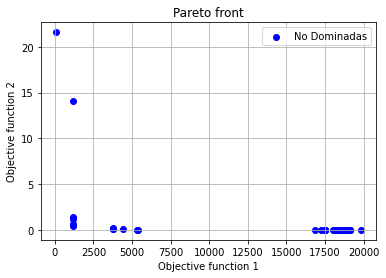

In [12]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import matplotlib.pyplot as plt

# Definimos los pesos de los objetivos. (1.0,) significa maximización.
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Creamos una caja de herramientas para la configuración de la evolución
toolbox = base.Toolbox()

# Registro de funciones de atributo, individuo y población
toolbox.register("attr_float", random.uniform, -10, 10)  # cada atributo es un float en el rango [-10, 10]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registro de funciones de evolución
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

# Definimos las funciones objetivo
def objective1(individual):
    return sum(x**2 for x in individual) # maximizar la suma de los elementos

def objective2(individual):
    return len(individual) / sum((x**3+1) for x in individual)  # maximizar la inversa de la suma de los elementos incrementados

# Y las restricciones
def constraint(individual):
    # La suma de los valores del individuo debe ser menor o igual a 2
    if sum(individual) <= 2:
        return True,
    return False,

toolbox.register("evaluate", lambda ind: (objective1(ind), objective2(ind)))
toolbox.decorate("evaluate", tools.DeltaPenality(constraint, 100))  # imponemos una penalidad si la restricción no se cumple

random.seed(64)
NGEN = 500
# MU = 50
# LAMBDA = 100
CXPB = 0.7
MUTPB = 0.3
MU = 50
LAMBDA = 100
pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
# stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
# stats.register("max", np.max, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                                         halloffame=hof)
# Extraer todas las soluciones generadas
all_solutions = np.array([ind.fitness.values for ind in pop])

# Extraer las soluciones no dominantes (frente de Pareto)
non_dominated_solutions = np.array([ind.fitness.values for ind in hof])

# Graficar el frente de Pareto y las soluciones dominantes
plt.scatter(non_dominated_solutions[:,0], non_dominated_solutions[:,1], c="b", label='No Dominadas')
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.legend()
plt.show()

## Ejemplo de https://github.com/Dany503/Algoritmos-Geneticos-en-Python-Un-Enfoque-Practico/tree/master/Cap4

### Problema de la suma de subconjuntos con múltiples objetivos

#### Descripción del problema:
Dado un conjunto de números enteros S y el entero c, el objetivo es encontrar el mínimo subconjunto de S, tal que la suma sea lo más cercana a c, sin excederse. Es decir:

$min\; c- \sum_{i=0}^{N-1}s_ix_i, \sum_{i=0}^{N-1}x_i $

sujeto a:

$\sum_{i=0}^{N-1}x_i \leq N$
y
$\sum_{i=0}^{N-1}s_ix_i \leq c$,


donde $s_i$ y $x_i$ son cada uno de los números del conunto S, así como una variable binaria que indica con 1 ($x_i=1$)si $s_i$ se incluye en el subconjunto y con cero en caso contrario ($x_i=0$).

Si se quisieran evaluar todas las combinaciones, se tendrían $2^n$, siendo $n$ el número de elementos en el conjunto original.

Los dos objetivos a satisfacer son:

1. *Número de elementos*: Minimizar el número de elementos que componen el subconjunto, de tal forma que los subconjuntos con menos elementos sean mejores.
2. *Diferencia*: Minimizar la diferencia con respecto al valor de c. Mientras menor la diferencia, mejor la solución. Si la suma sobrepasa c, se penalizará.

Se usará codificación binaria.

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt    
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

random.seed(42) 

# Límites de los valores del conjunto
LIMITE_INF, LIMITE_SUP = 0, 30
# Número de elementos del conjunto 
TAM_CONJUNTO = 30 ## tamaño S
SUMA_OBJETIVO = 10 ###  constante C
CONJUNTO = np.array(random.sample(range(LIMITE_INF, LIMITE_SUP), 
                                  TAM_CONJUNTO))

# Creamos los objetos para definir el problema y el tipo de individuo, 
# -1.0 significa que hay dos objetivos por minimizar
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0)) 
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Generación de individuos aleatorios
def crea_individuo(size):
    return [random.randint(0, 1) for i in range(size)]

# Generación de individuos y población inicial    
toolbox.register("attr", crea_individuo, TAM_CONJUNTO)
toolbox.register("individual", tools.initIterate, creator.Individual, 
                 toolbox.attr)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)
CONJUNTO

/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


array([20,  3,  0, 23,  8,  7, 24,  4, 28, 17,  2, 18, 13,  1, 27, 16, 21,
       29, 25,  9, 15, 11, 12,  5,  6, 22, 26, 10, 14, 19])

In [20]:
len(CONJUNTO)

30

In [21]:
# Función objetivo
def funcion_objetivo(individuo, suma_objetivo):
    """
    Función objetivo para el problema de la suma de subconjutos
    Entrada: Recibe como entrada el individuo y la suma objetivo 
    que se tiene que satisfacer con la suma de los elementos del subconjuto.
    Salida: Como objetivo 1 se devuelve el número de elementos del
    subconjunto. Como objetivo 2 se devuelve la diferencia con respecto
    a la suma objetivo.
    """
    subconjunto = CONJUNTO[np.array(individuo) == 1]
    suma_subconjunto = np.sum(subconjunto)
    diferencia = suma_objetivo - suma_subconjunto
    n_elementos = sum(individuo)
    if diferencia < 0: # nos pasamos
        return 10000, 10000 # pena de muerte    
    if n_elementos == 0: # no se selecciona ninguna elemento
        return 10000, 10000
    return n_elementos, diferencia

# Registro de operadores genéticos y función objetivo
toolbox.register("mate", tools.cxTwoPoint) 
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) 
toolbox.register("select", tools.selNSGA2) 
toolbox.register("evaluate", funcion_objetivo, suma_objetivo=SUMA_OBJETIVO) 

In [22]:
def plot_frente():
    """
    Representación del frente de Pareto que hemos obtenido
    """
    datos_pareto = np.loadtxt("fitnessconjuntos.txt", delimiter=",")    
    plt.scatter(datos_pareto[:, 0], datos_pareto[:, 1], marker="+", 
                color="b", s=50)    
    plt.xlabel("Elementos")
    plt.ylabel("Diferencias")
    plt.grid(True)
    plt.xlim([0, 17])
    plt.ylim([-20, 300])
    plt.legend(["Frente de Pareto"], loc="upper right")
#     plt.savefig("Pareto_conjunto.eps", dpi = 300)

In [23]:
def main():
    CXPB, MUTPB, NGEN = 0.7, 0.3, 200
    MU, LAMBDA = 300, 300
    pop = toolbox.population(MU)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()  
    pareto = tools.ParetoFront() 
    pop, logbook = algorithms.eaMuPlusLambda(pop , toolbox , mu=MU, 
                                             lambda_=LAMBDA, cxpb=CXPB,  
                                             mutpb=MUTPB, ngen=NGEN, 
                                             stats=stats, halloffame=pareto, 
                                             verbose=False)
    return pop, logbook, pareto


In [ ]:
if __name__ == "__main__":    
    pop, log, pareto = main()
    res_individuos = open("individuosconjuntos.txt", "w")
    res_fitness = open("fitnessconjuntos.txt", "w")
    for ind in pareto:
        print(ind)
        res_individuos.write(str(ind))
        res_individuos.write("\n")
        res_fitness.write(str(ind.fitness.values[0]))
        res_fitness.write(",")
        res_fitness.write(str(ind.fitness.values[1]))
        res_fitness.write("\n")
    res_fitness.close()
    res_individuos.close()
plot_frente()

## Práctica: 
- Modificar parámetros y graficar diferentes frentes de Pareto. Anotar observaciones.
- Cambiar las dos funciones objetivo. 